In [1]:
import ROOT
ROOT.gROOT.SetStyle("Modern")
import numpy as np

Welcome to JupyROOT 6.30/04


In [157]:
ROOT.gStyle.SetOptTitle(1)
ROOT.gStyle.SetTitleFontSize(0.08)

ROOT.gStyle.SetTextSize(0.1)
ROOT.gStyle.SetLabelSize(0.05, "XYZ")
ROOT.gStyle.SetTitleSize(0.05, "XYZ")

ROOT.gStyle.SetPadLeftMargin(0.15)
ROOT.gStyle.SetPadRightMargin(0.05)
ROOT.gStyle.SetPadTopMargin(0.10)
ROOT.gStyle.SetPadBottomMargin(0.15)


In [165]:
# Step 1: Define the observable
# Define a variable 'x' representing the observable with a range from 0 to 100 eV and set the number of bins to 20
x = ROOT.RooRealVar("E", "E", 0, 100, 'eV')
x.setBins(20)

# Step 2: Define the parameters for the Gaussian distribution
# Define the mean ('mu') of the Gaussian with an initial value of 50 and range from 0 to 100
mu = ROOT.RooRealVar("#mu", "#mu", 50, 0, 100)
# Define the standard deviation ('sigma') of the Gaussian with an initial value of 10 and range from 0.1 to 20
sigma = ROOT.RooRealVar("#sigma", "#sigma", 10, 0.1, 20)

# Step 3: Define the Gaussian distribution
# Create a Gaussian PDF with 'x' as the observable and 'mu' and 'sigma' as the parameters
gauss = ROOT.RooGaussian("gauss", "Gaussian PDF", x, mu, sigma)

# Step 4: Define the extended term (number of events)
# Define the number of events 'N' to be fitted
N = ROOT.RooRealVar("#lambda", "number of events", 1000, 0, 10000)

# Step 5: Define the extended Gaussian PDF
# The extended PDF is the product of the Gaussian PDF and the number of events
extended_gauss = ROOT.RooExtendPdf("extended_gauss", "extended Gaussian PDF", gauss, N)

# Step 6: Generate a toy dataset from the extended PDF
data = extended_gauss.generate(ROOT.RooArgSet(x), 1000)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


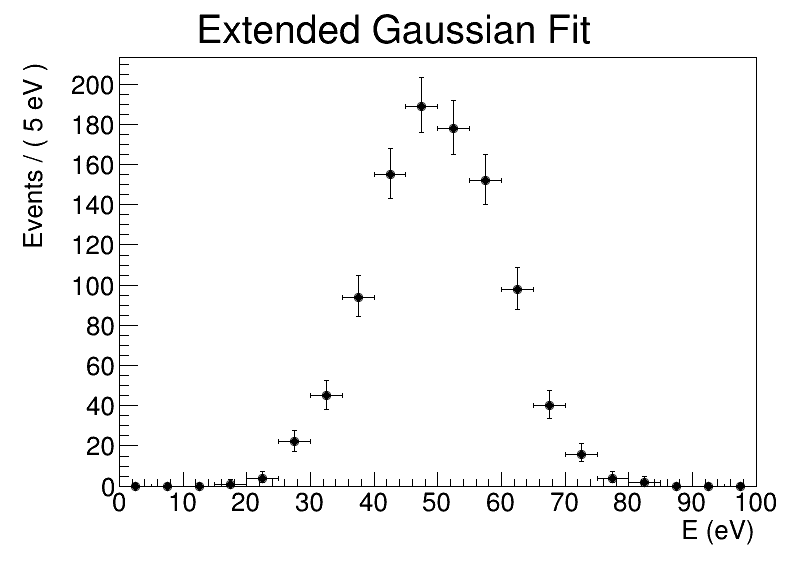

In [162]:
xframe = x.frame(ROOT.RooFit.Title('Extended Gaussian Fit'))
data.plotOn(xframe)
c = ROOT.TCanvas("c", "Extended Gaussian Fit", 800, 600)

# Draw the frame on the canvas
xframe.Draw()


# Update the canvas
c.Draw()

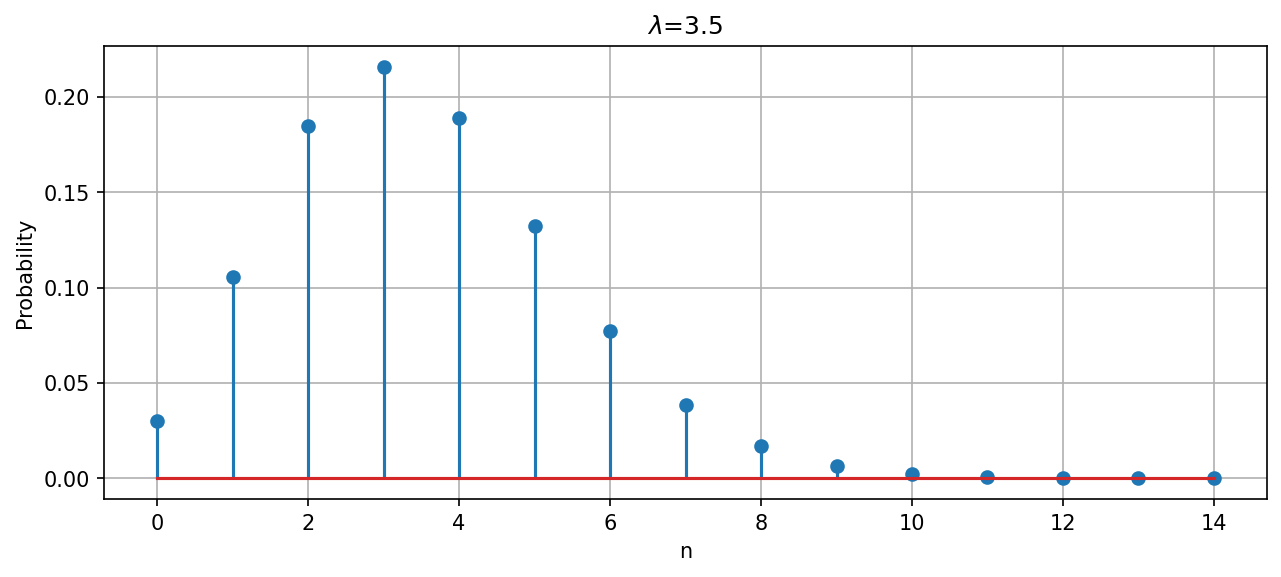

In [240]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Parameters for the Poisson distribution
mu = 3.5  # Mean of the distribution

# Generate values
x = np.arange(0, 15, 1)
y = poisson.pmf(x, mu)

# Create the plot
plt.figure(figsize=(10,4),dpi = 150)
plt.stem(x, y)
plt.xlabel('n')
plt.ylabel('Probability')
plt.title('$\lambda$={}'.format(mu))
plt.grid(True)


[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
Minuit2Minimizer: Minimize with max-calls 1500 convergence for edm < 1 strategy 1
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -2173.75897009029404
Edm   = 2.02077531067815046e-05
Nfcn  = 38
#lambda	  = 1000	 +/-  31.62	(limited)
#mu	  = 49.77	 +/-  0.3202	(limited)
#sigma	  = 10.12	 +/-  0.2263	(limited)
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: deactivating const optimization

  RooFitResult: minimized FCN value: -2174, estimated distance to minimum: 2.02e-05
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter    FinalValue +/-  Error   
  --------------------  --------------------------
               #lambda    1.0000e+03 +/-  3.16e+01
                   #mu    

Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =      -2173.345185 Edm =      0.4168249971 NCalls =     13
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : -2173.345185
  Edm           : 0.4168249971
  Internal parameters:	[     -0.927295218                0  -0.005025146777]	
  Internal gradient  :	[ -0.0009219685279      113.2906961     -25.66053048]	
  Internal covariance matrix:
[[  0.00022222218              0              0]
 [              0  8.0001201e-05              0]
 [              0              0  0.00097272315]]]
Info in <Minuit2>: VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 1500
Info in <Minuit2>: VariableMetricBuilder    0 - FCN =      -2173.345185 Edm =      0.4168249971 NCalls =     13
Info in <Minuit2>: VariableMetricBuilder    1 - FCN =       -2173.75897 Edm =    1.90930797e-05 NCalls =     20
Info in <Minuit2>: VariableM

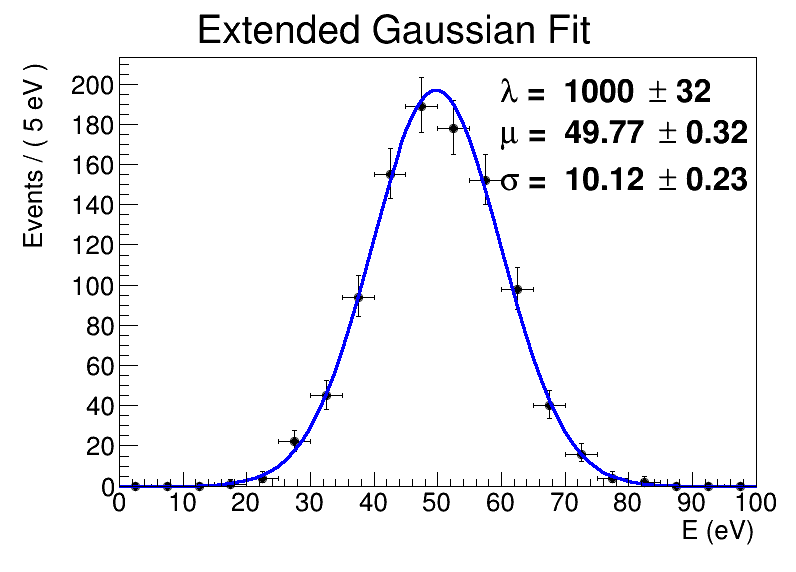

In [163]:
# Step 7: Fit the Gaussian distribution to the data
# Fit the extended Gaussian PDF to the generated dataset and save the fit result
fit_result = extended_gauss.fitTo(data, ROOT.RooFit.Save())

# Step 8: Plot the data and the fit result
# Create a frame for the variable 'x' with the title 'Extended Gaussian Fit'
xframe = x.frame(ROOT.RooFit.Title('Extended Gaussian Fit'))

# Plot the data on the frame
data.plotOn(xframe)

# Overlay the extended Gaussian PDF on the frame
extended_gauss.plotOn(xframe)

# Add the parameter values of the Gaussian PDF to the frame
extended_gauss.paramOn(xframe)

# Step 9: Draw the plot on a canvas
# Create a canvas to draw the frame
c = ROOT.TCanvas("c", "Extended Gaussian Fit", 800, 600)

# Draw the frame on the canvas
xframe.Draw()

# Update the canvas
c.Draw()

# Adjust the text size and position of the parameter box on the frame
xframe.getAttText().SetTextSize(0.06)
xframe.getAttText().SetX1NDC(0.62)
xframe.getAttText().SetX2NDC(0.8)
xframe.getAttText().SetY1NDC(0.65)
xframe.getAttText().SetY2NDC(0.88)


# Print the fit results
fit_result.Print()


Minuit2Minimizer: Minimize with max-calls 1000 convergence for edm < 1 strategy 1
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = 3751.21646793344098
Edm   = 8.135330539461165e-05
Nfcn  = 30
#mu	  = 50.11	 +/-  0.3258	(limited)
#sigma	  = 10.3	 +/-  0.2305	(limited)


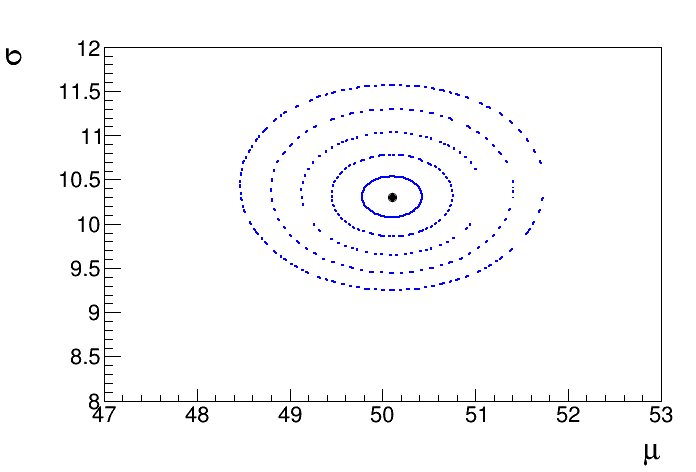

In [192]:
# Create the negative log-likelihood (NLL) for the Gaussian PDF using the dataset
nll = gauss.createNLL(data)

# Initialize the minimizer for the NLL
m = ROOT.RooMinimizer(nll)

# Set the minimizer type to 'Minuit2'
m.setMinimizerType('Minuit2')

# Set the print level to 0 to suppress output
m.setPrintLevel(0)

# Perform the minimization using the Migrad algorithm
m.migrad()

# Perform the Hessian calculation to estimate uncertainties
m.hesse()

# Create a contour plot for the parameters mu and sigma with confidence levels of 1, 2, 3, 4, and 5 standard deviations
frame = m.contour(mu, sigma, 1, 2, 3, 4, 5)

# Set the range of the x-axis (mu) to [47, 53]
frame.GetXaxis().SetRangeUser(47, 53)

# Set the range of the y-axis (sigma) to [8, 12]
frame.GetYaxis().SetRangeUser(8, 12)

# Set the title of the frame to an empty string
frame.SetTitle('')

# Set the label size for both x and y axes to 0.05
frame.SetLabelSize(0.05, 'xy')

# Set the title size for both x and y axes to 0.07
frame.SetTitleSize(0.07, 'xy')

# Create a canvas to draw the frame
c = ROOT.TCanvas()

# Draw the frame on the canvas
frame.Draw()

# Update the canvas
c.Draw()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3


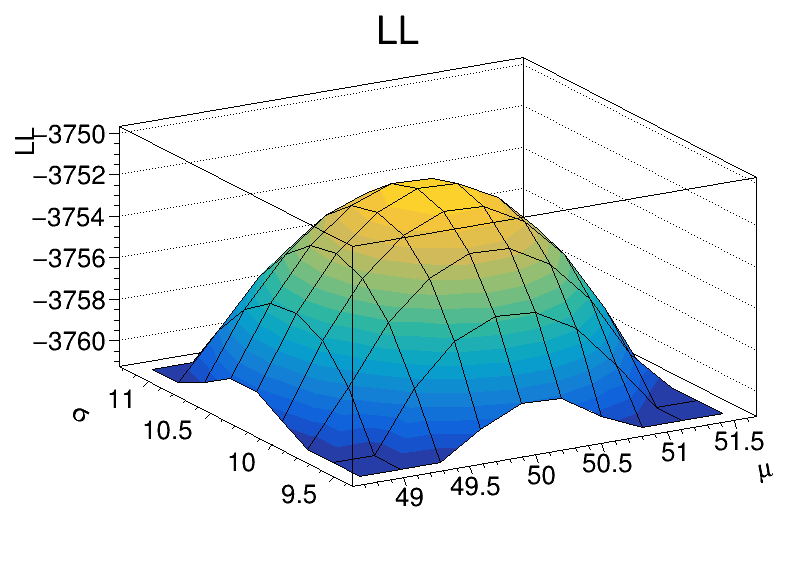

In [190]:
m.migrad()

# Obtain the uncertainties and values of mu and sigma
mu_error = mu.getError()
mu_val = mu.getVal()
sigma_error = sigma.getError()
sigma_val = sigma.getVal()

# Generate samples based on the uncertainties
mu_samples = np.random.normal(mu_val, 5 * mu_error, 10000)
sigma_samples = np.random.normal(sigma_val, 5 * sigma_error, 10000)

# Compute the LL values for each pair of mu and sigma samples
ll_values = []
for _mu, _sigma in zip(mu_samples, sigma_samples):
    mu.setVal(_mu)
    sigma.setVal(_sigma)
    ll_values.append(-nll.getVal())  # Flip the NLL to LL by taking the negative

# Create a 2D graph in ROOT
graph = ROOT.TGraph2D()

# Populate the graph with the mu, sigma, and LL values
for i in range(len(mu_samples)):
    graph.SetPoint(i, mu_samples[i], sigma_samples[i], ll_values[i])

# Create a canvas to draw the graph
c3 = ROOT.TCanvas("c3", "c3", 800, 600)

# Set the title and axis labels of the graph
graph.SetTitle("LL;#mu;#sigma;LL")

# Draw the graph with the "surf1" option for a 3D surface plot
graph.Draw("surf1")

# Update the canvas
c3.Draw()

# Set the range for the x-axis (mu) to be within 5 times mu_error around mu_val
graph.GetXaxis().SetRangeUser(mu_val - 4 * mu_error, mu_val + 4 * mu_error)

# Set the range for the y-axis (sigma) to be within 5 times sigma_error around sigma_val
graph.GetYaxis().SetRangeUser(sigma_val - 4 * sigma_error, sigma_val + 4 * sigma_error)

# Set the range for the z-axis (LL) to be within 10 units above the minimum LL value
graph.GetZaxis().SetRangeUser(max(ll_values) - 10, max(ll_values)+1)

# Adjust the offset for the axis titles for better visualization
graph.GetXaxis().SetTitleOffset(1.5)
graph.GetYaxis().SetTitleOffset(1.5)
graph.GetZaxis().SetTitleOffset(1.5)

# Adjust the binning
graph.GetXaxis().SetNdivisions(508)
graph.GetYaxis().SetNdivisions(508)
graph.GetZaxis().SetNdivisions(508)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3


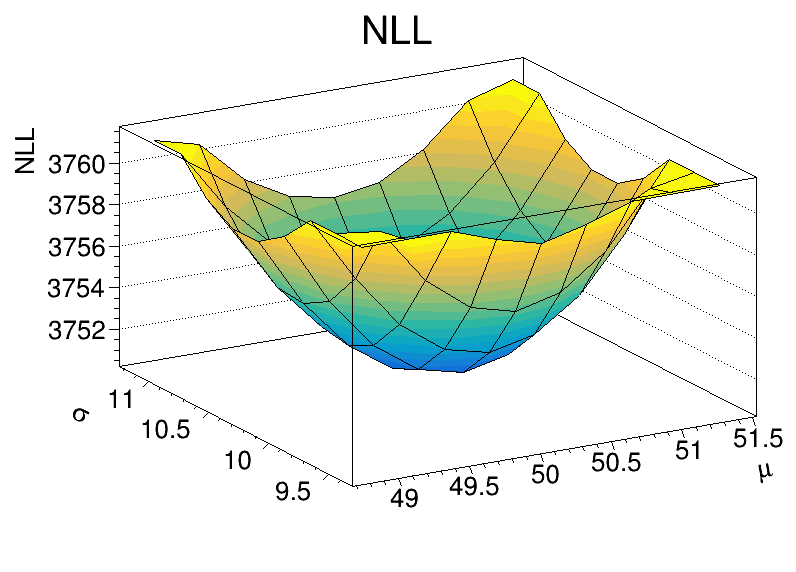

In [193]:
m.migrad()
# Obtain the uncertainties and values of mu and sigma
# Get the uncertainty of mu
mu_error = mu.getError()

# Get the fitted value of mu
mu_val = mu.getVal()

# Get the uncertainty of sigma
sigma_error = sigma.getError()

# Get the fitted value of sigma
sigma_val = sigma.getVal()

# Generate samples based on the uncertainties
# Generate 10,000 samples for mu based on a normal distribution centered around mu_val with a standard deviation of 10 times mu_error
mu_samples = np.random.normal(mu_val, 5 * mu_error, 10000)

# Generate 10,000 samples for sigma based on a normal distribution centered around sigma_val with a standard deviation of 10 times sigma_error
sigma_samples = np.random.normal(sigma_val, 5 * sigma_error, 10000)

# Compute the NLL values for each pair of mu and sigma samples
nll_values = []
for _mu, _sigma in zip(mu_samples, sigma_samples):
    mu.setVal(_mu)
    sigma.setVal(_sigma)
    nll_values.append(nll.getVal())

# Create a 2D graph in ROOT
graph = ROOT.TGraph2D()

# Populate the graph with the mu, sigma, and NLL values
for i in range(len(mu_samples)):
    graph.SetPoint(i, mu_samples[i], sigma_samples[i], nll_values[i])

# Create a canvas to draw the graph
c3 = ROOT.TCanvas("c3", "c3", 800, 600)

# Set the title and axis labels of the graph
graph.SetTitle("NLL;#mu;#sigma;NLL")

# Draw the graph with the "surf1" option for a 3D surface plot
graph.Draw("surf1")

# Update the canvas
c3.Draw()

# Set the range for the x-axis (mu) to be within 5 times mu_error around mu_val
graph.GetXaxis().SetRangeUser(mu_val - 4 * mu_error, mu_val + 4 * mu_error)

# Set the range for the y-axis (sigma) to be within 5 times sigma_error around sigma_val
graph.GetYaxis().SetRangeUser(sigma_val - 4 * sigma_error, sigma_val + 4 * sigma_error)

# Set the range for the z-axis (NLL) to be within 10 units above the minimum NLL value
graph.GetZaxis().SetRangeUser(min(nll_values) - 1, min(nll_values) + 10)

# Adjust the offset for the axis titles for better visualization
graph.GetXaxis().SetTitleOffset(1.5)
graph.GetYaxis().SetTitleOffset(1.5)
graph.GetZaxis().SetTitleOffset(1.5)


# Adjust the binning
# Set the number of divisions for the x-axis (mu) to 508
graph.GetXaxis().SetNdivisions(508)

# Set the number of divisions for the y-axis (sigma) to 508
graph.GetYaxis().SetNdivisions(508)

# Set the number of divisions for the z-axis (NLL) to 508
graph.GetZaxis().SetNdivisions(508)


Minuit2Minimizer: Minimize with max-calls 1000 convergence for edm < 1 strategy 1
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = 3751.21638667520529
Edm   = 8.38362544872750647e-11
Nfcn  = 24
#mu	  = 50.1	 +/-  0.3258	(limited)
#sigma	  = 10.3	 +/-  0.2304	(limited)


Warning in <Minuit2>: VariableMetricBuilder No improvement in line search


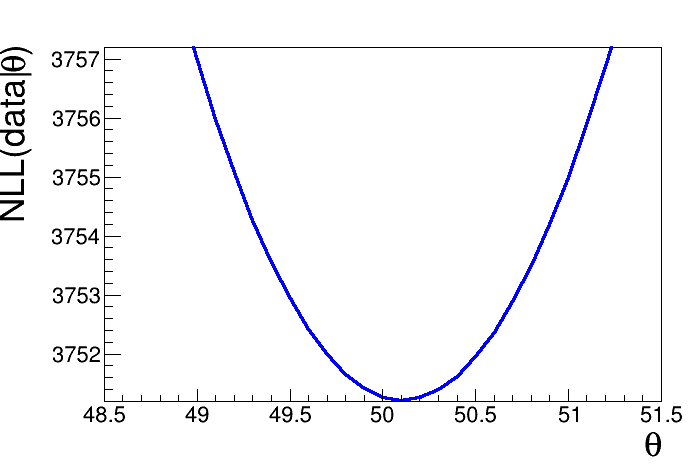

In [220]:
# go to min again.
m.migrad()
m.hesse()

mu_mean = mu.getVal()
mu_err = mu.getError()



frame = mu.frame(Title = ' ',Bins= 100,Range = (45,55))


nll_plot = nll.plotOn(frame,LineColor=ROOT.kBlue,Name="t")
nll_plot.GetXaxis().SetTitleOffset(0.7)
nll_plot.GetYaxis().SetTitleOffset(1)

nll_plot.GetXaxis().SetRangeUser(48.5,51.5)
nll_plot.GetYaxis().SetRangeUser(3751.2,3757.2)



nll_plot.GetYaxis().SetTitle('NLL(data|#theta)')
nll_plot.GetXaxis().SetTitle('#theta')
nll_plot.SetTitleSize(0.08,'xy')
c = ROOT.TCanvas()
nll_plot.Draw()
c.Draw()


c.Draw()


# Create a legend
# legend = ROOT.TLegend(0.43, 0.6, 0.69, 0.8)
# legend.AddEntry(frame.FindObject('t'), "t", "l")
# legend.Draw()

Minuit2Minimizer: Minimize with max-calls 1000 convergence for edm < 1 strategy 1
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = 3751.21638667520529
Edm   = 8.38379743857771061e-11
Nfcn  = 24
#mu	  = 50.1	 +/-  0.3258	(limited)
#sigma	  = 10.3	 +/-  0.2304	(limited)


Warning in <Minuit2>: VariableMetricBuilder No improvement in line search


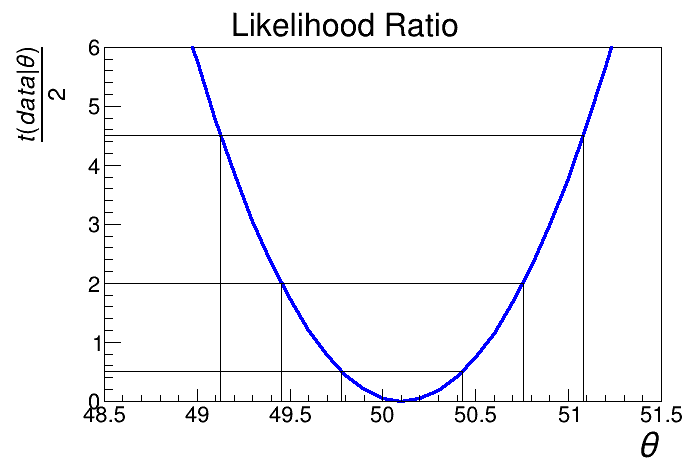

In [212]:
# go to min again.
m.migrad()
m.hesse()

mu_mean = mu.getVal()
mu_err = mu.getError()



frame = mu.frame(Title = 'Likelihood Ratio',Bins= 100,Range = (45,55))


nll_plot = nll.plotOn(frame,LineColor=ROOT.kBlue,ShiftToZero=True,Name="t")
nll_plot.GetXaxis().SetTitleOffset(1.5)
nll_plot.GetYaxis().SetTitleOffset(0.7)
nll_plot.GetXaxis().SetTitleOffset(0.7)
nll_plot.GetXaxis().SetRangeUser(48.5,51.5)
nll_plot.GetYaxis().SetRangeUser(0,6)



nll_plot.GetYaxis().SetTitle('\\frac{t(data|\\theta)}{2}')
nll_plot.GetXaxis().SetTitle('\\theta')
nll_plot.SetTitleSize(0.08,'yx')
c = ROOT.TCanvas()
nll_plot.Draw()
c.Draw()


l = ROOT.TLine()
l.SetLineColor(ROOT.kBlack)


l.DrawLine(c.GetUxmin(),
           0,
           c.GetUxmax(),
           0)


l.DrawLine(c.GetUxmin(),
           0.5,
           mu_mean+mu_err,
           0.5)
l.DrawLine(mu_mean-mu_err,
           0,
           mu_mean-mu_err,
           0.5)
l.DrawLine(mu_mean+mu_err,
           0,
           mu_mean+mu_err,
           0.5)


l.DrawLine(c.GetUxmin(),
           2,
           mu_mean+2*mu_err,
           2)
l.DrawLine(mu_mean-2*mu_err,
           0,
           mu_mean-2*mu_err,
           2)
l.DrawLine(mu_mean+2*mu_err,
           0,
           mu_mean+2*mu_err,
           2)



l.DrawLine(c.GetUxmin(),
           4.5,
           mu_mean+3*mu_err,
           4.5)
l.DrawLine(mu_mean-3*mu_err,
           0,
           mu_mean-3*mu_err,
           4.5)

l.DrawLine(mu_mean+3*mu_err,
           0,
           mu_mean+3*mu_err,
           4.5)
c.Draw()


# Create a legend
# legend = ROOT.TLegend(0.43, 0.6, 0.69, 0.8)
# legend.AddEntry(frame.FindObject('t'), "t", "l")
# legend.Draw()

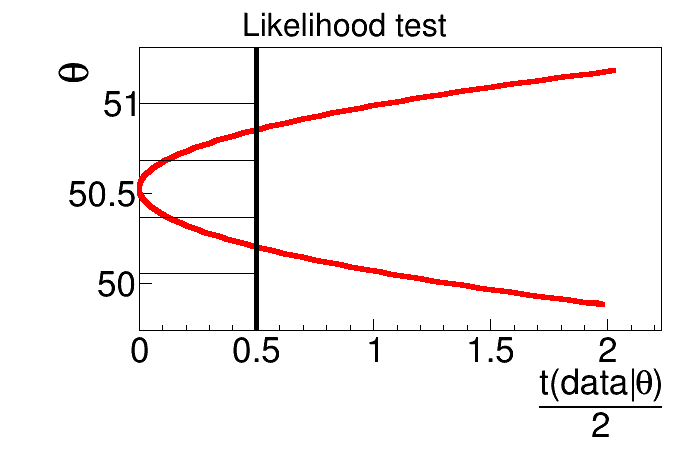

In [147]:
frame = mu.frame(Title = ' ',Bins= 100,Range = (mu_mean-2*mu_err,mu_mean+2*mu_err))
nll_plot = nll.plotOn(frame,LineColor=ROOT.kBlue,ShiftToZero=True,Name="t")
graph = frame.findObject('t')
_x = np.array(graph.GetX())
_y = np.array(graph.GetY())

graph = ROOT.TGraph(len(_x[1:-2]),_y[1:-2],_x[1:-2])
graph.GetXaxis().SetLabelSize(0.08)
graph.GetYaxis().SetLabelSize(0.08)
graph.GetXaxis().SetNdivisions(505)
graph.GetYaxis().SetNdivisions(104)
graph.SetLineColor(2)
graph.SetLineWidth(5)
graph.SetTitle('Likelihood test;#frac{t(data|#theta)}{2};#theta ')
graph.GetXaxis().SetTitleSize(0.08)

graph.GetXaxis().SetTitleOffset(1.2)
graph.GetYaxis().SetTitleOffset(0.6)
# graph.GetYaxis().CenterTitle(1)

l = ROOT.TLine()
l.SetLineWidth(5)
l.SetLineColor(1)

c = ROOT.TCanvas()
c.SetBottomMargin(0.3)
c.SetLeftMargin(0.2)
graph.Draw('ALC')
c.Draw()
l.DrawLine(0.5,ROOT.gPad.GetUymin(),0.5,ROOT.gPad.GetUymax())

y_values = np.linspace(c.GetUymin(),c.GetUymax(),6)
l.SetLineWidth(1)
for val in y_values:
    l.DrawLine(0,
               val,
               0.5,
               val)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: test


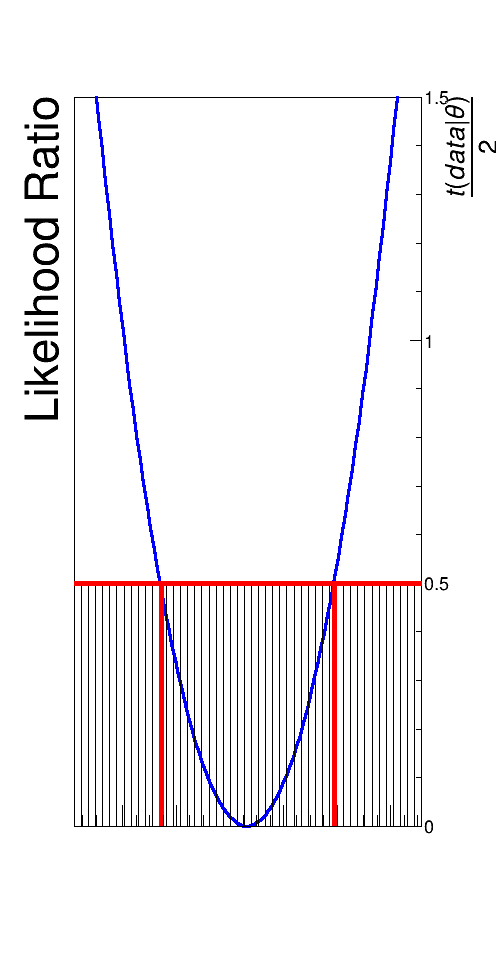

In [64]:
frame = mu.frame(Title = ' ',Bins= 100,Range = (mu_mean-2*mu_err,mu_mean+2*mu_err))


nll_plot = nll.plotOn(frame,LineColor=ROOT.kBlue,ShiftToZero=True,Name="t")
nll_plot.GetXaxis().SetTitleOffset(1.5)
nll_plot.GetYaxis().SetTitleOffset(0.7)

nll_plot.GetXaxis().SetRangeUser(mu_mean-2*mu_err,mu_mean+2*mu_err)
nll_plot.GetYaxis().SetRangeUser(0,1.5)



nll_plot.GetYaxis().SetTitle('Likelihood Ratio')
nll_plot.GetXaxis().SetTitle('\\theta')
nll_plot.GetXaxis().CenterTitle(1)

nll_plot.SetTitleSize(0.1,'y')
nll_plot.SetLabelSize(0.0,'y')
nll_plot.GetYaxis().SetTickLength(0)
nll_plot.GetYaxis().SetTitleOffset(0.4)



c = ROOT.TCanvas('test','test',20,20,500,1000)
nll_plot.Draw()
c.Draw()
c.SetRightMargin(0.15)

label_font = nll_plot.GetYaxis().GetLabelFont()
title_font =nll_plot.GetYaxis().GetTitleFont()


axis8 = ROOT.TGaxis(mu_mean+2*mu_err, 0, mu_mean+2*mu_err, 1.5, 0, 1.5, 505, "+L")
axis8.SetTitle('\\frac{t(data|\\theta)}{2}')
axis8.SetTitleSize(0.08)
axis8.SetTitleOffset(0.8)
axis8.SetTitleFont(title_font)
axis8.SetLabelFont(label_font)


axis8.Draw()

l = ROOT.TLine()
l.SetLineColor(ROOT.kBlack)


x_values = np.linspace(c.GetUxmin(),c.GetUxmax(),50)
for val in x_values:
    l.DrawLine(val,
               0,
               val,
               0.5)

    
l.SetLineColor(ROOT.kRed)
l.SetLineWidth(5)
l.DrawLine(c.GetUxmin(),
           0.5,
           c.GetUxmax(),
           0.5)

l.DrawLine(mu_mean-mu_err,
           0,
           mu_mean-mu_err,
           0.5)

l.DrawLine(mu_mean+mu_err,
           0,
           mu_mean+mu_err,
           0.5)

nll_plot.GetXaxis().SetLabelOffset(999);
nll_plot.GetXaxis().SetTickLength(0);



newaxis = ROOT.TGaxis(c.GetUxmax(), 
                      c.GetUymin(),
                      c.GetUxmin(),
                      c.GetUymin(),
                      nll_plot.GetXaxis().GetXmin(),
                      nll_plot.GetXaxis().GetXmax(),
                      810,"-");
newaxis.SetTitleFont(title_font)
newaxis.SetLabelFont(label_font)

newaxis.SetLabelOffset(1)
newaxis.Draw()
c.Draw()

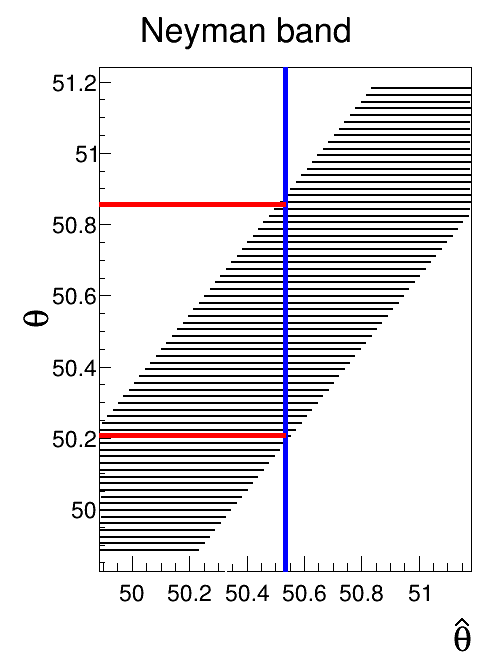

In [8]:
# I'm cheating here. It's a well-educated Neyman band instead of calculation. 
# Plotting ticks may be useful.


c = ROOT.TCanvas('','',500,700)
c.SetLeftMargin(0.2)

tf = ROOT.TF1('test','x',mu_mean-2*mu_err,mu_mean+2*mu_err)
tf.SetLineColor(ROOT.kWhite)

tf.SetNameTitle('tf1','Neyman band;#hat{#theta};#theta')
tf.GetXaxis().SetTitleSize(0.08)
tf.GetXaxis().SetTitleOffset(0.7)
tf.GetYaxis().SetTitleSize(0.08)
tf.GetYaxis().SetTitleOffset(1)
tf.GetYaxis().CenterTitle(1)
tf.DrawClone()



tf = ROOT.TF1('test','x-0.5',49, 52)
tf.SetLineColor(ROOT.kWhite)
tf.DrawClone('same')

for i in np.linspace(mu_mean-2*mu_err,mu_mean+2*mu_err,70):
    lower, upper = i-0.35, i+0.35
    tf = ROOT.TF1('test',f'{i}',lower, upper)
    tf.SetLineColor(ROOT.kBlack)
    tf.DrawClone('same')


c.Draw()

line = ROOT.TLine()
line.SetLineColor(ROOT.kBlue)
line.SetLineWidth(5)
line.DrawLine(mu_mean,
               c.GetUymin(),
               mu_mean,
               c.GetUymax())

line.SetLineColor(ROOT.kRed)
line.SetLineWidth(5)
line.DrawLine(c.GetUxmin(),
              mu_mean-mu_err,
              mu_mean,
              mu_mean-mu_err)

line.SetLineColor(ROOT.kRed)
line.SetLineWidth(5)
line.DrawLine(c.GetUxmin(),
              mu_mean+mu_err,
              mu_mean,
              mu_mean+mu_err)



In [9]:
ROOT.gStyle.SetLabelSize(0.1, "XYZ")
ROOT.gStyle.SetTitleSize(0.1, "XYZ")


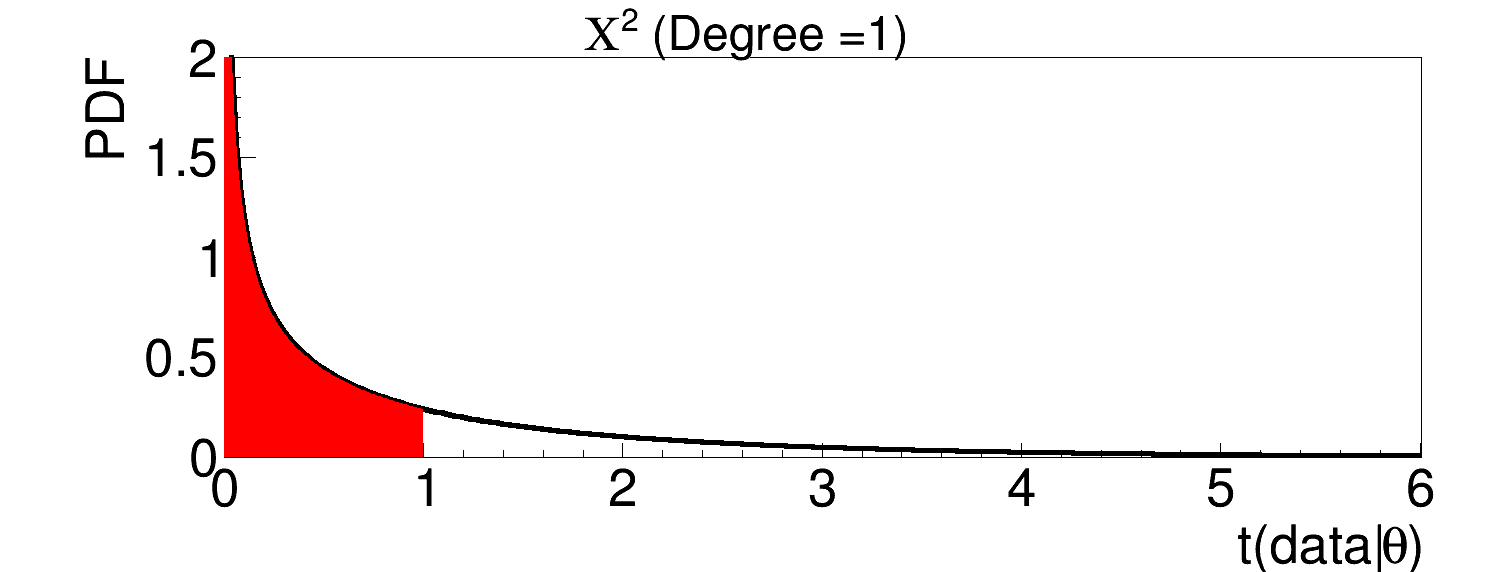

In [10]:
x = np.linspace(1e-3,20,1000,dtype='float64')
y = np.array([ROOT.Math.chisquared_pdf(i, 1, 0) for i in x],dtype='float64')


graph = ROOT.TGraph(len(x),x,y)
graph.SetTitle('#Chi^{2} (Degree =1);t(data|#theta);PDF')

c = ROOT.TCanvas('','',1500,600)
c.SetBottomMargin(0.2)

graph.Draw('ALC')
graph.GetYaxis().SetRangeUser(0,2)
graph.GetXaxis().SetRangeUser(0,6)
graph.SetLineWidth(5)
graph.GetYaxis().SetTitleOffset(0.5)
graph.GetYaxis().SetNdivisions(505)


x = np.linspace(1e-3,1,100,dtype='float64')
y = np.array([ROOT.Math.chisquared_pdf(i, 1, 0) for i in x],dtype='float64')

x = np.concatenate([[x[0]],x,[x[-1]]])
y = np.concatenate([[0],y,[0]])

graph1 = ROOT.TGraph(len(x),x,y)
graph1.GetYaxis().SetRangeUser(0,2)
graph1.GetXaxis().SetRangeUser(0,6)
graph1.SetFillColor(ROOT.kRed)
graph1.Draw('same,F')


c.Draw()

In [11]:
mu.setVal(10)
sigma.setVal(50)

fit_result = extended_gauss.fitTo(data, ROOT.RooFit.Save(),Verbose =1,PrintLevel=2)

[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
Minuit2Minimizer: Minimize with max-calls 1500 convergence for edm < 1 strategy 1
#mu=10, #sigma=19.9771, 
prevFCN = -173.2458398  #mu=10, 
prevFCN = -173.4925008  #mu=9.997, 
prevFCN = -172.9992015  #mu=10.01, 
prevFCN = -173.7167458  #mu=9.994, 
prevFCN = -172.7750166  #mu=10, #sigma=19.98, 
prevFCN = -173.3819586  #sigma=19.98, 
prevFCN = -173.1074458  #sigma=19.98, 
prevFCN = -173.2719903  #sigma=19.98, 
prevFCN = -173.2196064  #sigma=19.98, N_{total}=1000, 
prevFCN = -173.2457897  N_{total}=999.7, 
prevFCN = -173.2457899  #mu=10.01, N_{total}=1000, 
prevFCN = -173.7167458  #mu=10.03, 
prevFCN = -175.601197  #mu=10.09, 
prevFCN = -180.3180917  #mu=10.28, 
prevFCN = -194.5176156  #mu=10.85, 
prevFCN = -237.5399016  #mu=12.64, 
prevFCN = -369.9785127  #mu=16.99, 
prevFCN = -673.5294663

Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator 3 free parameters, FCN pointer 0x7ffe1a7eb960
Info in <Minuit2>: InitialGradientCalculator Calculating initial gradient at point 	[     -0.927295218      1.502919026    -0.9272951162]	
Info in <Minuit2>: InitialGradientCalculator Computed initial gradient for parameter #mu value -0.927295 [ -0.010884 , 0.0107283 ] dirin 0.0108062 grd 92.5397 g2 8563.6
Info in <Minuit2>: InitialGradientCalculator Computed initial gradient for parameter #sigma value 1.50292 [ -0.157681 , 0.0659242 ] dirin 0.111803 grd 8.94434 g2 80.0013
Info in <Minuit2>: InitialGradientCalculator Computed initial gradient for parameter N_{total} value -0.927295 [ -0.0106161 , 0.0104679 ] dirin 0.010542 grd 94.8589 g2 8998.22
Info in <Minuit2>: Numerical2PGradientCalculator Calculating gradient around function value -173.246 
	 at point 	[     -0.927295218      1.502919026    -0.9272951162]	
Info in <Mi

In [39]:
w = ROOT.RooWorkspace('w')
w.factory('sum::total(a[0,10],b[0,10])')
w.factory('Gaussian:gaus3(x[0,100],total,total)')
# w.factory('PROD:model(gaus1,gaus2,gaus3)')

data= w['gaus3'].generate([w['x']],1000)
w['a'].setVal(1)
w['b'].setVal(10)
w['gaus3'].fitTo(data)

<cppyy.gbl.RooFitResult object at 0x(nil)>

[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
Minuit2Minimizer: Minimize with max-calls 1000 convergence for edm < 1 strategy 1
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = 3415.86104394850736
Edm   = 1.16384690718816984e-06
Nfcn  = 41
a	  = 0.9772	 +/-  1.779	(limited)
b	  = 9.19	 +/-  1.756	(limited)
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: deactivating const optimization


Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =       3423.420439 Edm =       3.671438912 NCalls =      9
Info in <Minuit2>: NegativeG2LineSearch Doing a NegativeG2LineSearch since one of the G2 component is negative
Info in <Minuit2>: MnSeedGenerator Negative G2 found - new state: 
  Minimum value : 3415.896469
  Edm           : 0.07170818069
  Internal parameters:	[     -0.927295218      1.002704177]	
  Internal gradient  :	[      4.474259721        4.0097905]	
  Internal covariance matrix:
[[   0.0069913841              0]
 [              0   0.0091347411]]]
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 3415.896469
  Edm           : 0.07170818069
  Internal parameters:	[     -0.927295218      1.002704177]	
  Internal gradient  :	[      4.474259721        4.0097905]	
  Internal covariance matrix:
[[   0.0069913841              0]
 [              0   0.0091347411]]]
Info